In [ ]:
from quadradure_lib import quad_NC2, quad_NC3, quad_NC4, quad_NC5, quad_Ga1, quad_Ga2, quad_Ga3
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [ ]:

def quad_morceaux(a,b,n,f,myquad):
    s = 0.;
    xi = np.linspace(a,b,n+1)
    for i in range(n):
        a = xi[i]
        b = xi[i+1]
        s = s + myquad(a,b,f)
        
    return s



Nmorceaux = [2**i for i in range(10)]
for m in methods.keys():
    quad_fun = methods[m]
    for N in Nmorceaux:
        Iapp[m].append(quad_morceaux(a,b,N,f,quad_fun))        
        error[m].append(np.abs(Iapp[m][-1] - Iex)/Iex)

H = [(b-a)/N for N in Nmorceaux]

plt.figure(2)
for m in methods.keys():
    plt.plot([b-a] + H, error[m], '-o', label = m)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

**1) Lecture et modèle**

D'abord on va lire le fichier Data0.txt (obtenus par de mesures experimentales) et on va constater que la fonction 
$$
f(t) = c_0 + c_1 \exp(-t/T1) + c_2 \exp(-t/T2)
$$
permet de rapprocher très bien les données avec des valeurs $c0 = 1.05, c1 = 1, c2 = 1, T1=1, T2=100$
**pour le rapport**
- Constater l'affirmation ci-dessus avec des courbes.
- Discuter si est plus intéressant intégrer numériquement le modèle ou les données expérimentales.

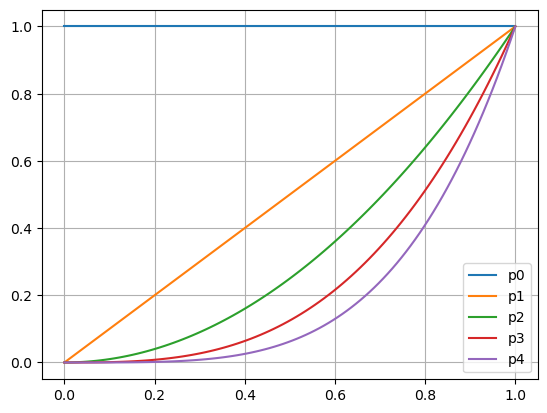

In [ ]:
XY = np.loadtxt('Data0.txt');
X=XY[:,0]
Y=XY[:,1]
NX=len(X)
a, b = X.min() , X.max()

def model(t):
    # initialiser c0, c1,c2,T1,T2 
    return # à compléter

Yr = f(X)

plt.figure(1)
plt.plot(X,Y, label = 'mesures')
plt.plot(X,Yr, label = 'modele')
plt.legend()

**2) Valeurs exactes de l'intégrale**

En trouvant la primitive de du modèle donné ci-dessus, programmer l'expression exacte de sa primitive. A savoir l'intégrale entre $[a,b]$ devra être approximativement $1150.99546$

In [ ]:
def F(t):
    c0 = 1.05;
    c1 = 1;
    c2 = 1;
    T1=1;
    T2=100;
    return # compléter

Iex = F(b)- F(a)
print(Iex)

**3) Méthodes de quadrature simple**

Vérifier que eles méthodes de quadrature simple ne sont pas capables de bien approximer cet intégrale.
**pour le rapport**
- Quelle méthode est le meilleur (ou plutôt le moins pire)?

In [ ]:
methods = { 'NC2': quad_NC2,
            'NC3': quad_NC3,
            'NC4': quad_NC4,
            'NC5': quad_NC5,
            'Ga1': quad_Ga1,
            'Ga2': quad_Ga2,
            'Ga3': quad_Ga3}

Iapp = {}
error = {}
for m in methods.keys():
    quad_fun = methods[m]
    Iapp[m] = [quad_fun(a,b,f)]
    error[m] = [np.abs(Iapp[m][-] - Iex)]


print(Iapp)
print(error)

**4) Méthodes de quadrature composés** 

En divisant l'intervale $[a,b]$ en $N$ morceaux, on peut créer un partition tel que $a=x_0 < x_1 < x_2 < \dots < x_{N-1} < x_N = b$, avec $x_i = a + H \times i$, $H = (b-a)/N$. On a donc
$$
\int_{a}^b f(x) dx = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x) dx \approx \sum_{i=0}^{N-1} Q(x_i, x_{i+1};f)
$$
où $Q(x_i, x_{i+1};f)$ est une quadrature (quilconque) de $f(x)$ en $[x_i,x_{i+1}]$. 

Votre code devra passer au test ci-dessous.

In [ ]:
# N : nombre de morceaux, intervale [a,b], intégrant f, quad_fun est la fonction de quadrature à être utilisé 
def quad_morceaux(a,b,N,f,quad_fun):
    s = 0. 
    xi = # np.linspace(?,?,?)
    for i in range(N):
        ai = # complétez 
        bi = # complétez
        s += # complétez 
        
    return s

INC3_2 = quad_morceaux(0,50.0,2,f,quad_NC3)
assert(abs(INC3_2- 96.0137160749924) < 1e-10) # assert permet de vérifier si le valeur est correct. S'il n'affiche pas d'erreur, donc c'est bon.

INC3_4 = quad_morceaux(0,50.0,4,f,quad_NC3)
quad_morceaux(0,50,4,f,quad_NC3)
assert(abs(INC3_4- 93.94637340153311) < 1e-10) 

**5) Convergence par rapport au nombre de divisions**

Nous vous proposons de diviser l'intervale avec une puissance de $2$ a chaque fois, c'est à dire, $N=2, 4, 8, \dots$.

**Pour le rapport vous devez**: 
- Vérifier qu'il existe une nombre de division minimale pour chaque méthode tel que l'erreur diminue presque de façon "linéaire" (en échelle logarithmique)
- Apartir de combien de divisions, l'erreur pour Ga3 suit le dite comportement "linéaire"?
- Décrivez qualitativement la différence entre les convegences des méthodes de Gauss et Newton-Cotes. 

In [ ]:
Nmorceaux = # déclarer une liste avec les nombres de morceaux admissibles choississant une puissance maximale de 2, e.g [2**i for i blablabla ]

for m in methods.keys():
    quad_fun = methods[m]
    for N in Nmorceaux:
        Iapp[m].append(quad_morceaux(a,b,N,f,quad_fun))        
        error[m].append(np.abs(Iapp[m][-1] - Iex))

Nmorceaux = [1] + Nmorceaux # juste pour ajouter le cas avec une seule division au début

plt.figure(2)
for m in methods.keys():
    plt.plot(Nmorceaux, error[m], '-o', label = m)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

**6) Convergence par rapport a la taille de divisions**

Ensuite on va étudier l'ordre de convergence $k$ par rapport a $H$. 

En supposant 
$$
e_N = C \left[\frac{b-a}{N} \right]^k 
$$
on peut démontrer que 
$$
k \approx - \frac{ \log \frac{e_2^{n+1}}{e_2^{n}}}{\log 2}
$$
où $n$ est la position de la liste de puissances binaires, tel que l'ordre d'erreur semble stable.

**Pour le rapport vous devez**: 
- Démontrer la formule ci-dessous (obs: utilisez les propriétés du logarithmiques).
- Calculer numériquement l'ordre de convergence (Obs1: $k$ en théorie est un entier, on calcule par contre une valeur approchée, disons $3,99 \approx 4$, Obs2: parfois on doit augmenter le nombre de divisions afin d'obtenir $k$ stable, mais s'on diminue trop on peut trouver la barriere de la précision de la machine).
- Contraster théorie vs pratique

In [ ]:
# étudier également par rapport à H 
H = [(b-a)/N for N in Nmorceaux]
plt.figure(3)
for m in methods.keys():
    plt.plot(H, error[m], '-o', label = m)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

# Programmer la formule pour k. Vous pouvez calculer k pour chaque pair d'erreurs sucessives jusqu'à trouver une estabilisation,
#  sinon juste pour le dernier et avant dernier erreur. 

**7) étude ouvert**

Si vous restez du temps. Vous pouvez retourner cette script avec une fonction $f(x)$ différent, par exemple la fameuse fonction "cloche" des probabilité $f(x) = \exp{-x^2}$? 